In [1]:
import rama
import getcoordinates
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from importlib import reload
import time
#%matplotlib inline
%matplotlib notebook

In [2]:
# based on getcoordinates
tmax = 2 #units of years
dt = 0.001 #units of years
t = np.linspace(0, tmax, int(tmax/dt))

r, v = getcoordinates.get_perifocal()
er, ev = getcoordinates.get_heliocentric(r, v)

rama_r =[[-2.0002,1.99998,.19994]]
rama_v = [[7.97836,-3.667243,-0.005509]]

er, ev = getcoordinates.add_Rama(er, ev, rama_r, rama_v)

In [3]:
xt1, vt, KE, UE, TE = rama.dynamics(er, ev, dt, tmax)

Iteration: 369 , Rama distance from Earth (au): 0.000261543741199


<IPython.core.display.Javascript object>


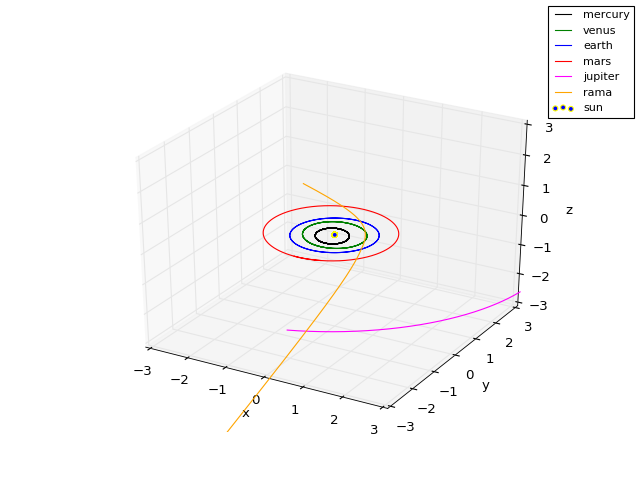

In [4]:
mpl.rcParams['legend.fontsize'] = 10

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(xt1[:,0,0],xt1[:,0,1],xt1[:,0,2], color='yellow', label='sun')
ax2.plot(xt1[:,1,0],xt1[:,1,1],xt1[:,1,2], color='black', label='mercury')
ax2.plot(xt1[:,2,0],xt1[:,2,1],xt1[:,2,2], color='green', label='venus')
ax2.plot(xt1[:,3,0],xt1[:,3,1],xt1[:,3,2], color='blue', label='earth')
ax2.plot(xt1[:,4,0],xt1[:,4,1],xt1[:,4,2], color='red', label='mars')
ax2.plot(xt1[:,5,0],xt1[:,5,1],xt1[:,5,2], color='magenta', label='jupiter')
#ax2.plot(xt1[:,6,0],xt1[:,6,1],xt1[:,6,2], color='blue', label='saturn') # These three planets are so far out that they skew the chart.
#ax2.plot(xt1[:,7,0],xt1[:,7,1],xt1[:,7,2], color='green', label='uranus')
#ax2.plot(xt1[:,8,0],xt1[:,8,1],xt1[:,8,2], color='cyan', label='neptune')
if len(ev) == 11:
    ax2.plot(xt1[:,10,0],xt1[:,10,1],xt1[:,10,2], color='orange', label='rama')
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.auto_scale_xyz([-2,2],[-2,2],[-2,2])
ax2.legend(bbox_to_anchor=(1,1), bbox_transform=plt.gcf().transFigure)